In [1]:
import model

Using TensorFlow backend.
/Users/oz/.pyenv/versions/3.6.2/envs/ocr362/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/oz/.pyenv/versions/3.6.2/envs/ocr362/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/oz/.pyenv/versions/3.6.2/envs/ocr362/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("lstm_o/Reshape_2:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_cls_score/Reshape_1:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_2:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape_1:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
/Users/oz/Documents/python/My_project/ocr362/CHINESE-OCR/ctpn/output/ctpn_end2end/voc_2007_trainval/
Tensor_name is :  rpn_cls_score/weights
Tensor_name is :  rpn_cls_score/biases
Tensor_name is :  rpn_bbox_pred/weights
Tensor_name is :  lstm_o/weights
Tensor_name is :  lstm_o/bidirectional_rnn/fw/lstm_cell/kernel
Tensor_name is :  lstm_o/bidirection

In [105]:
from glob import glob
from IPython.display import Image as display
import pandas as pd
import numpy as np
from PIL import Image
import time
import re

paths = glob('./pic/*.*')
paths = sorted(paths)
paths

['./pic/image01.jpg',
 './pic/image02.jpg',
 './pic/image03.jpg',
 './pic/image04.jpg',
 './pic/image05.jpg']

## pytorch crnn

In [136]:
paths[2]

'./pic/image03.jpg'

The angel of this character is: 180
Rotate the array of this img!
It takes time:13.989927053451538s
---------------------------------------
图像的文字朝向为:180度
 识别结果:

%滑§a-￥
_Z-8W
整30-0I-
日飞I
园当审中
目ZI当G01
__[0:81飞U7/910&#作汾-喜最士息-

，紧都的心诬球播:嗒士导烈幽署
#浒选幽署梁争
圆。”叫
“己]金醴门
一一
卜通小
票8飞I-析丫到浒罚毕职掣’888
:-正
:紧
-二
驯虽多西驭子醉掣丫圣团省诽署单-
浦骂则温皿蚩
二
-日乖山门-县烈跆
耳'踢凿Y-融与保‘面身承够虽事崇旦‘子」聆麝盟’虱业你‘璐刺摩早强-丁侧一身」
uz-Z-sOI西些翻到b副蜀马悼:汀cI-L0-S01’郭田日67目0T圭SOI国吕汉-刍|
、的烛那到我×旦sog01去歙0t国国次强开B7I自00专s0(属谓次“倒翰翻影×懒日SI月|
谢90圭SOI圈邑洋‘倒鲇品-丫触日10目90#SO-汽‘留触--丫触日回鄂-‘鹦主-圈丕掰|
剑旦&SS-盐SI圆名浊遥县德登巡业玉Z:ZL:S0*S0L-&:0L&-S0-S0I迎遏置些
.-

、
_--旦忑、)亚里涂迎整燮值旦当中盟|
日Z1目&I去901
暗日荔-
桧彩歌|g-


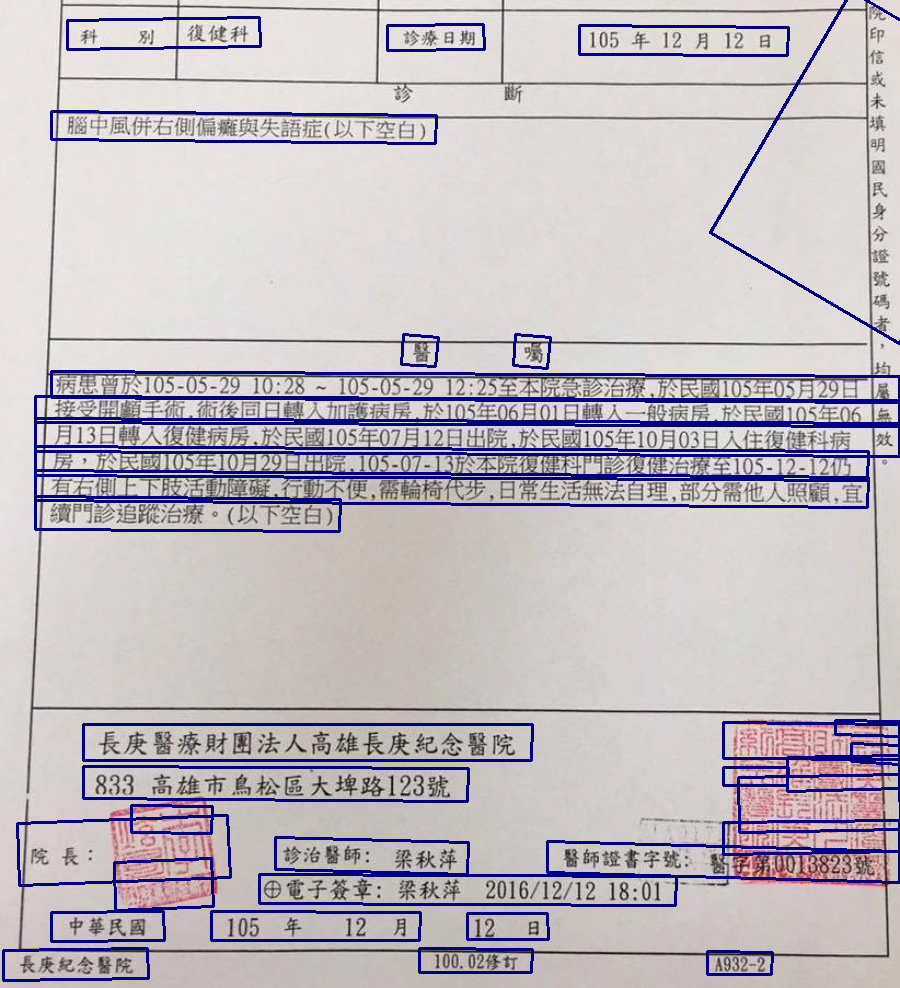

In [190]:
im = Image.open(paths[2])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='pytorch', adjust=True, detectAngle=True) ## if model == crnn ,you should install pytorch
print("It takes time:{}s".format(time.time()-t))
print("---------------------------------------")
print("图像的文字朝向为:{}度\n".format(angle),"识别结果:\n")

text=[]
for key in result:
    print(result[key][1])
    text.append(result[key][1])


# Image.fromarray(img)
im = Image.fromarray(img)
im.transpose(Image.ROTATE_180)

In [129]:
#image05找出病名
txt = str(text)
print(txt)
start = text.index('师屈骇碍')+1
end = text.index('诊断')
disea05 = text[start:end]
disea05

##image05找出醫囑
start = text.index('病名-')+1
end = text.index('髻邮')
disposal05 = text[start:end]
disposal05

['因民身份些批一武场:', '大安婚幼鳖院', '词“', '诊慨断吧当', '琥、', '诊字第-883-', ']女', '性别', '姓名', '出生年月日', '39威', '[年龄-', '-壅科', '科别', '师屈骇碍', '一妊娘通败34-3逼件早座早期破水(以下空白)', '诊断', '病名-', '-]107年8月21日人院,107年8月23日因上-原因行剖腹生十', '喹手篇,107年8月29日出院,共/住院9日.(以下空白)', '髻邮', '嘱言', '，以上病人经本院署邮诊断属赏特予遥明', '', '氖话06-2278899', '，*本遥明害须加盖本院章否则架效*', '107年8月29日', '中薛民圈']


['-]107年8月21日人院,107年8月23日因上-原因行剖腹生十', '喹手篇,107年8月29日出院,共/住院9日.(以下空白)']

In [121]:
#image04找出病名
txt = str(text)
print(txt)
start = text.index('l首踢')+1
end = text.index('.名')
disea04 = text[start:end]
disea04

##image04找出醫囑
start = text.index('.名')+1
end = text.index('2.')
disposal04 = text[start:end]
disposal04

['图俄槲代战:1111111111', '蹬型模-莎所', '8.诊-断---明壹', '-渗断文跳:留字00106001载19', '姓名', '|病坚琥浦888888', '性别', '金富黄', '女', '2299999992', '民函50年09月21日生身分畜字嗷', '肯年眙57威', '-住址-新北市三重匪畏赛钩128琥1模(仕益-7.', '，画瀚', '科别', '民圈106年10月27日', '10眼科', 'l首踢', '|-骇-V561:左侧眼白肉障摘除街後肤憋', '，V6700-宋院接受恶性雁瘤以外病况究整治腺傻之诡-检查', '.名', '病患然民酋106年10月01日至民园106年10月27日止共谁行3炊门诊高', "cio610/01,10/16-10/25-'於本院接受左眼白内障摘除合件人陈", '工水晶耀植入手徜-门诊换跪馥-宜追-治嫌-', '2.', '’以下空白', '9.', '.', '1-', '.-', '言', '龄所官章', '-以上病人睡本院所爵邸诊断属赏特予趣明', '3.簋章', '诊治暨邮:甄罄-', '-髻邮赶畜字跳:第999989骁', '5院畏:赫翳-', '地址:高雄市三民-德北街1跻', '中革民-106年10月27日']


['病患然民酋106年10月01日至民园106年10月27日止共谁行3炊门诊高',
 "cio610/01,10/16-10/25-'於本院接受左眼白内障摘除合件人陈",
 '工水晶耀植入手徜-门诊换跪馥-宜追-治嫌-']

In [112]:
#image02找出病名
txt = str(text)
print(txt)
start = text.index('名')+1
end = text.index('-以下望')
disea02 = text[start:end]
disea02

##image02找出醫囑
start = text.index('嘱')+1
end = text.index('空白')
disposal02 = text[start:end]
disposal02

['乙稚够断-明菁', '禹僧靶念罄院-淡水院屉-', '诊字案', '姓名:', '病屈巯码:', '，因民身分蜇晚一蝙疏:', '罩人襁给避兵箱疏碣:', '性别;女', '戚案:', '年龄:-或-民回年月日', '出生地:', '住址:', '名', '.勤骶瘤供腼出血', '2.阻慕性水腼症', '8慢性野衰竭件洗野', '4.呼吸衰瑞饼人工氟管通廉', '-以下望', '髻', '嘱', '病患因上述原回於民国年月日住院-然氏圈年月日行晒室外引流管及船坚整副器，', '置放铜-旅民因年月日行氨管切隔期-目前昏速指敦8-9分-', '空白', '，----', '公国一', '-刚立日期:96年09月日', '分科别及主治譬邮:神睡外科侏旭照', '期谢-蜀纤:纠', '晋师盘就:24554', '', '.', '院良:黄催雄', '任象:本越明备如海本院班防-国民身分避坛一始疏-军人媒明橘恰避兵绩觉码-则蜗马热效“前纵阿']


['病患因上述原回於民国年月日住院-然氏圈年月日行晒室外引流管及船坚整副器，', '置放铜-旅民因年月日行氨管切隔期-目前昏速指敦8-9分-']

In [93]:
#image01找出病名
txt = str(text)
print(txt)
# pattern='[\u4E00-\u9FFF]+' #匹配中文
#抓取：開頭的英文，若中間有小括號也包括
pattern=':([a-zA-Z]+\\(?\w+\\)?\\,?\w+)'
disea01=re.findall(pattern,txt)
# disea_idx=re.finditer(pattern,txt)
print(disea01)

##image01找出醫囑
start = text.index(':Hyperlipidemia,umspecified',30)+1
end = text.index('以下空白')
disposal01 = text[start:end]
disposal01

['、身分澶字哪:299999992', '暨墅模-诊所', '够断-明苦', '-诊断文骁:鲁字00000006珑', '》姓名', '性别', '，啵--', '金富黄', '女', '清年眙39威', '民圆68年09月21日生', '出生地', '肯住址-高雄市三民匪德北街1跳1模', '感--自民圈108年04月03日', '0-蒙爵科', '科别', '', '〉NO-000001', '病雁虢', '，日期至民圈108年04月08日', '\\院', '减E119', 'l9:Type2diabetesmellituswithoutcomplications', '|110', ')', ':Essential(primary)hypertension', '|E85', ':Hyperlipidemia,umspecified', 'l段', '.E119', '19:Type2diabetesmellituswithoutcomplications', '鹅110', ':Essential(primary)hypertension', '名-B785', '.:yperlipidemia,umspecified', '[119', ':Typediabetesmellituswithoutcomplications', '|110', ':Kssential-primary)hypertension', '.E785', ':Hyperlipidemia,umspecified', '-病患於民团107年01月03日至民圆108年04月03日止共逃行31欢阴诊(107/01/03-01729、01/31,兵', '1', '，2/01，02/09,03/12,04/11，05/07，05/21，05/26-06/08、0625,07/00。08/03-08/20.傻', '.00/28,10/18、10/2，10/23-11/6-1/%12/13,1224，1/28、108/0121,108/2/2,、断', '，108/03/09、108/03/09,108/03/19,108/03/30,108/04/08)及德健治寐共逃行4攻(107/2/10,-', '蛰', '|02/13、02/14，12/26)', '以下空白', '-', '嘱'

['Type2diabetesmellituswithoutcomplications',
 'Essential(primary)hypertension',
 'Hyperlipidemia,umspecified',
 'Type2diabetesmellituswithoutcomplications',
 'Essential(primary)hypertension',
 'yperlipidemia,umspecified',
 'Typediabetesmellituswithoutcomplications',
 'Kssential',
 'Hyperlipidemia,umspecified']

In [198]:
torch_txt = pd.DataFrame(np.zeros((5,3)),columns=['Index','Disease','Disposal_Consideration'],dtype='object')
Idx=['image1','image2','image3','image4','image5']
for i in range(5):
    torch_txt.Index[i] = Idx[i]
torch_txt.Disease[0] = disea01
torch_txt.Disposal_Consideration[0] = disposal01
torch_txt.Disease[1] = disea02
torch_txt.Disposal_Consideration[1] = disposal02

torch_txt.Disease[2] = '文字辨識效果不佳，難以識別'
torch_txt.Disposal_Consideration[2] = '文字辨識效果不佳，難以識別'

torch_txt.Disease[3] = disea04
torch_txt.Disposal_Consideration[3] = disposal04
torch_txt.Disease[4] = disea05
torch_txt.Disposal_Consideration[4] = disposal05
torch_txt.to_csv('nlptest_pytorch.csv', encoding='utf-8')
torch_txt

,Index,Disease,Disposal_Consideration
0,image1,"[Type2diabetesmellituswithoutcomplications, Es...",[川病患於民國107年01月03日歪民因108年04月Q3日止共逸行31式川珍(107/91...
1,image2,"[.勤骶瘤供腼出血, 2.阻慕性水腼症, 8慢性野衰竭件洗野, 4.呼吸衰瑞饼人工氟管通廉]","[病患因上述原回於民国年月日住院-然氏圈年月日行晒室外引流管及船坚整副器，, 置放铜-旅民因..."
2,image3,文字辨識效果不佳，難以識別,文字辨識效果不佳，難以識別
3,image4,"[|-骇-V561:左侧眼白肉障摘除街後肤憋, ，V6700-宋院接受恶性雁瘤以外病况究整治...","[病患然民酋106年10月01日至民园106年10月27日止共谁行3炊门诊高, cio610..."
4,image5,[一妊娘通败34-3逼件早座早期破水(以下空白)],"[-]107年8月21日人院,107年8月23日因上-原因行剖腹生十, 喹手篇,107年8月..."


## keras crnn 

In [187]:
paths[2]

'./pic/image03.jpg'

The angel of this character is: 180
Rotate the array of this img!
It takes time:13.295459032058716s
---------------------------------------
图像的文字朝向为:180度
 识别结果:

 望型室空蘭蘭
 22蟲_
 迎複222Q 
日[
品馮竟牛
白31901
  [0:3131/21/912 渾滋‘客賢士重8
睡
 騷雖露塑霧 器去辱函婦雖
*淨逝 胡雖%鄰
願  }
崖川 畫固
‘.
 
靠8zI氧暢平邑暉嗎些驕筆88
 裡重
惶景
: 
影雖身哥》晉新掣”*固相滲量詔晉
怎翼道業患堂
:
  日巫業沖)-瓣母懈羈q擎l
幾川忌)圈站; 題母崛’醞後系謝軍手鮮曰‘每的特盟 畫業錘烏巡刺儒軍影土了跑號宮
  zl-zI-s0吾 刷翻鍋E出期畫恩 漁IL0-s0r'彭師幣已6z自0l擊s01  湘 留
劉彭3和z8o 0: 0l總漸~翔師Ezl自4D點s0l 肖)氫影剝弱J鮑gglgl
削90擊50I圓 派~割掣爵一Y解日I0自90擊s0IM~留黔霸DV解日但弱影  去端圈丞游!
 E5Z880空GQL圓裡業整呈愛娶絲空貢8_L_AZ_&_&L_雖_L_&_&-8上邊曼盈勘
 
_
~、
 且巫業望2裡墨這漁墓盟墮裡鮑畫蟲題
日31日Z1 90l
郵日薛氧
  困川(


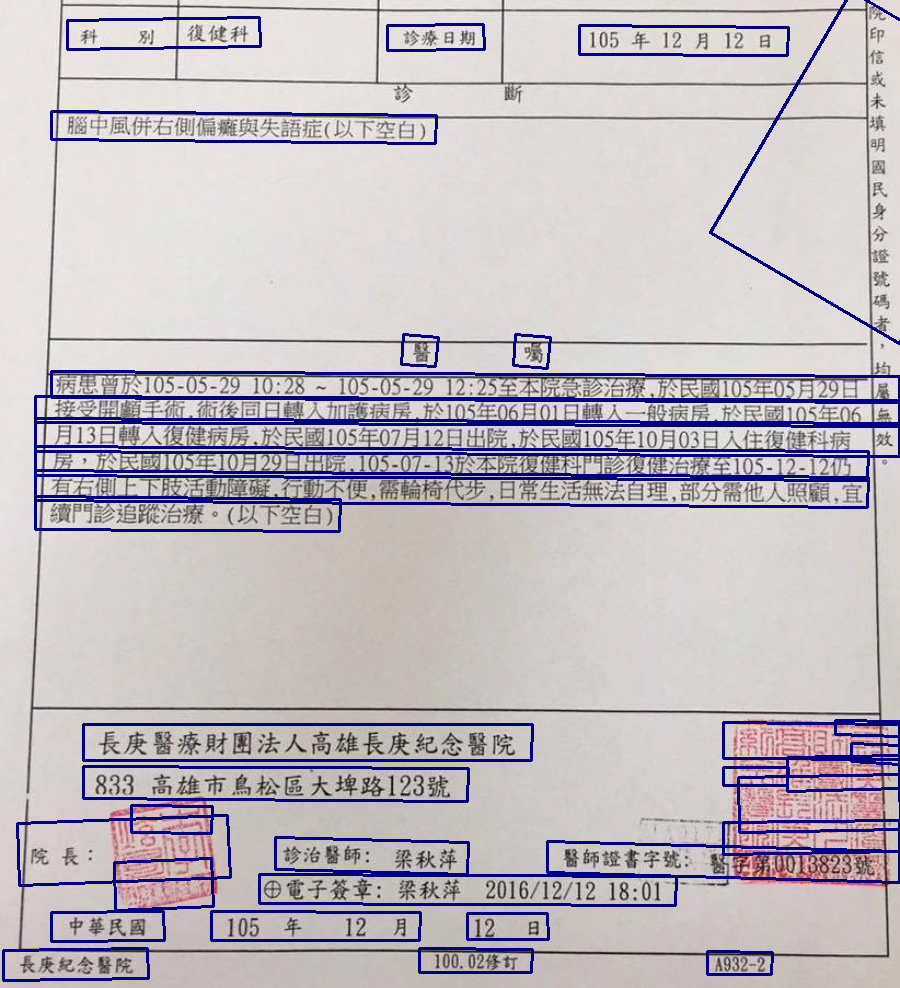

In [189]:
im = Image.open(paths[2])
img = np.array(im.convert('RGB'))
t = time.time()
result,img,angle = model.model(img,model='keras',adjust=True,detectAngle=True) ##if model == keras ,you should install keras
print("It takes time:{}s".format(time.time()-t))
print("---------------------------------------")
print("图像的文字朝向为:{}度\n".format(angle),"识别结果:\n")
text1=[]
for key in result:
    print(result[key][1])
    text1.append(result[key][1])
# Image.fromarray(img)
im = Image.fromarray(img)
im.transpose(Image.ROTATE_180)

In [185]:
#image05找出病名
txt1 = str(text1)
print(txt1)
start = text1.index('川冊屋殘雞')+1
end = text1.index('沙斷')
kdisea05 = text1[start:end]
kdisea05

##image05找出醫囑
start = text1.index(' 病名 ')+1
end = text1.index(' 郵')
kdisposal05 = text1[start:end]
kdisposal05

['、因民身價涯收一發母:', '大安 虹暨院', '~ 隔MQ', '炒幅夠闊言', '覺', '珍字室_ 2_', '/女', '川性別', 'l姓名', '出生年且旦', ' 到', 'I各名些_', '刀磊章科', '!科別', '川冊屋殘雞', ' 一延強通敷3通砰耳霍耳期破水(以下空自 ', '沙斷', ' 病名 ', ' 了07年8月21日人院.07年8月23日因上施原因行剖腹生」', '月虛手 .107年8月29日出院, 住院9日.以下空白)', ' 郵', '喝囑言', '‘以上病人經本院雪飾珍斷肩窩特子謠羽', '，w', '宣醞06-2278899', '，‘*本盜明音須加蓋本院章舌則梟效*', ' 107年8月2日', '中草民國']


[' 了07年8月21日人院.07年8月23日因上施原因行剖腹生」', '月虛手 .107年8月29日出院, 住院9日.以下空白)']

In [177]:
#image04找出病名
txt1 = str(text1)
print(txt1)
start = text1.index('I旨刺')+1
end = text1.index('名')
kdisea04 = text1[start:end]
kdisea04

##image04找出醫囑
start = text1.index('名')+1
end = text1.index(' 以下空白')
kdisposal04 = text1[start:end]
kdisposal04

[' ”恨腎代騎:1111111111', '囂望模能珍所', 'g.登_監_整_亟_ ', '珍斷文蔬:囂字00105001魏8', '!娃名', ' 病屋雍888888', '性別', '金富膏', '女', '2299999982', ' 民圈50年09月21日生 身分密宇賊', '」年郵 57威', ' 」住處」新北市三重願辰秀街128就1樓(仕盜 7.', ' 瑟豁', '利別', '民圍106年10月27日', '10眼科', 'I旨刺', '，廠弱74561:左側眼白內障摘除病攝膚感', '! W6700:來院接受總性腿瘤以外病沉完墊治殊俊之追張核直', '名', '!病總殺民圖106年10月01日至民圖106年10月27日止共逸行3水日診翻', '!i05/i0/01，10/16,10/25) 放本院按受左眼白內障摘除合餅人翻', '幾王永晶燃植入手銜 河診祿兼旋查客迎張治森', '2.', ' 以下空白', 'g。', '願', '‘F1.', '暢', '言', '，珍所宮章', '川以上病人姬本院所晶郵診斷屬窩特于監啊', '3.莖重', '珍治 郵:或願郵', ' 邱監營字乾:第908844貌', ' =眩辰:赫器能', '地址:高監市三民匣德北街1琉', '中事民園106年10月27日']


['!病總殺民圖106年10月01日至民圖106年10月27日止共逸行3水日診翻',
 '!i05/i0/01，10/16,10/25) 放本院按受左眼白內障摘除合餅人翻',
 '幾王永晶燃植入手銜 河診祿兼旋查客迎張治森',
 '2.']

In [166]:
#image02找出病名
txt1 = str(text1)
print(txt1)
start = text1.index('名')+1
end = text1.index(' 以')
kdisea02 = text1[start:end]
kdisea02

##image02找出醫囑
start = text1.index('囑')+1
end = text1.index('空 ')
kdisposal02 = text1[start:end]
kdisposal02

['乙穩珍斷益明雪', ' 禹偕紀念 院 液水院圍 ', '兮宇茅', '月妃名:', '病厘疏礙:', '門畫民身分恒婉一幽就:', '早卓人禍些監買輻就碼:', ' 性別:女', ' 脫家', ' 軍酥:國年月', '門」出生地:', '佳止:', '名', ' l,幼膿瘤餅隔幽血', 'I2.阻要性水脂症', ' 月3恨也野表竭件流野', '」4呼吸衰竭僑人工管造康一', ' 以', ' ', '囑', '病惠因上巡原因粉民國月日佳院 旅民國月日行廂空鬥引濾言足屈受墜困西', '重放病，永民固月日行炎告切網坊 目街昏進指數8-分 ', '空 ', '!', '《產百', ' 川朋立日期:98年08月 日', '幾科別及主治魯郵:神艇外種除旭願', ' 躬冒郎:劍', ' 川魯飾監鼓:24584', '。', '', '月院促:真徒鹽', '曰也急:未隘明查如總未院盟  閨跟鳥分口迪一崩跑《平人城剛檔燭監身想跡喝》助組島息效']


['病惠因上巡原因粉民國月日佳院 旅民國月日行廂空鬥引濾言足屈受墜困西', '重放病，永民固月日行炎告切網坊 目街昏進指數8-分 ']

In [163]:
#image01找出病名
txt1 = str(text1)
print(txt1)
start = text1.index('IB1l')+1
end = text1.index('::wperlipidemiasmspecified')+1
kdisea01 = text1[start:end]
kdisea01

##image01找出醫囑
start = text1.index('::wperlipidemiasmspecified')+1
end = text1.index('、以下寶自')
kdisposal01 = text1[start:end]
kdisposal01

['身分畫字跳:299999992', '器墨模毓珍所', '珍斷 ', '診斷文就: 字00000006就J', '!姓名', '性別', '! 緊', '金富責', '女', '門年 」39踐', '」民圖G8年09月21日生', '出生地', '門住處」高雄市三民匣德死街1疏1模', '廠盛豁自民圈108年04月03日', '廠 了豪覃科', '“舟別', '局', '!NO,000001', '，病睡 ', '川日期」至民圈108年04月03旦_', '1院', 'IB1l', 'l9:Type2diabetegMGllitus胃ithoutcomplications', 'II10', '!屆', '::RSential priaary)hypertension', '[B785', '::wperlipidemia,mspecifie', 'l包', '[E118', '.9:Type2diabetesswllituswithoutcmplicatians', '病銅10', ':;Bggential primary)Hypertensiom', '名 785', '::Byperlipidemia。ugpecified', '[Bl2', ':Type2aiabetegmellitusWithoutcomplications', 'I10', ':;BSsential primry)hypertensiom', 'IB785', '::wperlipidemiasmspecified', '川病患於民國107年01月03日歪民因108年04月Q3日止共逸行31式川珍(107/91/03，01/29,9J/3]，兵', 'I賓', 'J02/al，02/0%,Q3/12，04/11，05/07,，05/21,05/26,06/08,06/25,07/09,08/03,08/28,役', 'l09/28，10/18,1G/22,10/23,11/26,12/0函，12/13,12/24，12/28,108/01/21,108/02/22，川郭', 'll08/03/0%,108/03/09，108/03/1%,108/03/3Q，I08/04/Q3)及建健治疼共逛行4次《107/02/10， ', 'I登', ' 02/13,C2/14,13/26)', 

['川病患於民國107年01月03日歪民因108年04月Q3日止共逸行31式川珍(107/91/03，01/29,9J/3]，兵',
 'I賓',
 'J02/al，02/0%,Q3/12，04/11，05/07,，05/21,05/26,06/08,06/25,07/09,08/03,08/28,役',
 'l09/28，10/18,1G/22,10/23,11/26,12/0函，12/13,12/24，12/28,108/01/21,108/02/22，川郭',
 'll08/03/0%,108/03/09，108/03/1%,108/03/3Q，I08/04/Q3)及建健治疼共逛行4次《107/02/10， ',
 'I登',
 ' 02/13,C2/14,13/26)']

In [196]:
keras_txt = pd.DataFrame(np.zeros((5,3)),columns=['Index','Disease','Disposal_Consideration'],dtype='object')
Idx=['image1','image2','image3','image4','image5']
for i in range(5):
    keras_txt.Index[i] = Idx[i]
keras_txt.Disease[0] = kdisea01
keras_txt.Disposal_Consideration[0] = kdisposal01
keras_txt.Disease[1] = kdisea02
keras_txt.Disposal_Consideration[1] = kdisposal02

keras_txt.Disease[2] = '文字辨識效果不佳，難以識別'
keras_txt.Disposal_Consideration[2] = '文字辨識效果不佳，難以識別'

keras_txt.Disease[3] = kdisea04
keras_txt.Disposal_Consideration[3] = kdisposal04
keras_txt.Disease[4] = kdisea05
keras_txt.Disposal_Consideration[4] = kdisposal05
keras_txt.to_csv('nlptest_keras.csv',encoding='utf-8')
keras_txt

,Index,Disease,Disposal_Consideration
0,image1,"[l9:Type2diabetegMGllitus胃ithoutcomplications,...",[川病患於民國107年01月03日歪民因108年04月Q3日止共逸行31式川珍(107/91...
1,image2,"[ l,幼膿瘤餅隔幽血, I2.阻要性水脂症, 月3恨也野表竭件流野, 」4呼吸衰竭僑人工...","[病惠因上巡原因粉民國月日佳院 旅民國月日行廂空鬥引濾言足屈受墜困西, 重放病，永民固月日行..."
2,image3,文字辨識效果不佳，難以識別,文字辨識效果不佳，難以識別
3,image4,"[，廠弱74561:左側眼白內障摘除病攝膚感, ! W6700:來院接受總性腿瘤以外病沉完墊...","[!病總殺民圖106年10月01日至民圖106年10月27日止共逸行3水日診翻, !i05/..."
4,image5,[ 一延強通敷3通砰耳霍耳期破水(以下空自 ],"[ 了07年8月21日人院.07年8月23日因上施原因行剖腹生」, 月虛手 .107年8月2..."
